# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv",sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = df

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

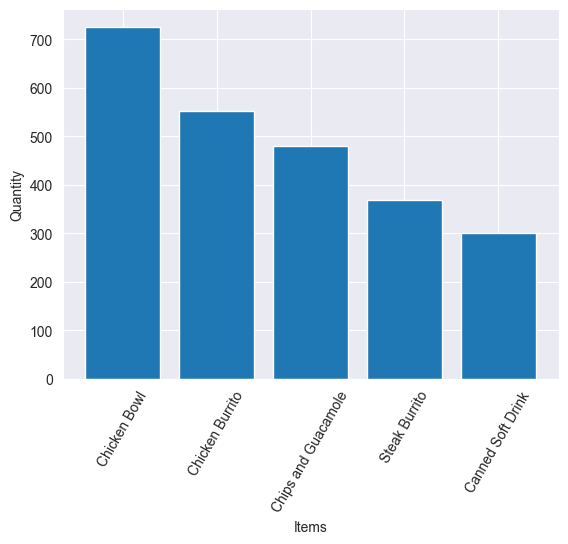

In [8]:
s = set()
for i in range(len(chipo)):
  s.add(chipo.loc[i].item_name)
d = dict.fromkeys(s,0) 
for i in range(len(chipo)):
  d[chipo.loc[i].item_name] += 1
sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)
top = sorted_items[:5]
keys,vals = zip(*top)
plt.bar(keys,vals)
plt.xticks(rotation=60)
plt.xlabel("Items")
plt.ylabel("Quantity")
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

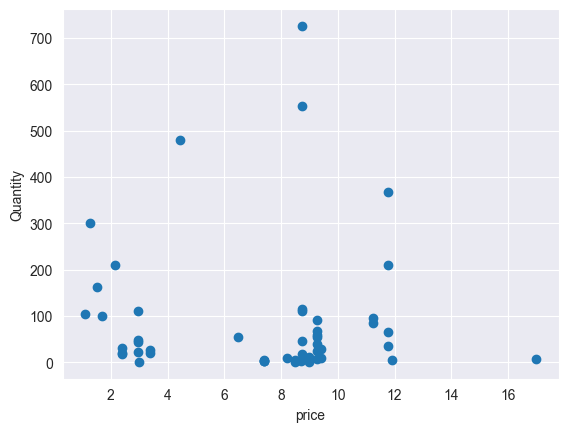

In [9]:
d1 = {key: [0, 0] for key in s}
for i in range(len(chipo)):
  d1[chipo.loc[i].item_name][0] = float(chipo.loc[i].item_price[1:])
  d1[chipo.loc[i].item_name][1] += 1
d1 = sorted(d1.items(), key = lambda x: x[1][0])
keys =  tuple(item[1][0] for item in d1)
values =  tuple(item[1][1] for item in d1)
plt.scatter(keys, values)
plt.xlabel("price")
plt.ylabel("Quantity")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [10]:
## FIND 5 best sales and worst sales and plot it into the same fig
sorted_items
worst5 = sorted(sorted_items[-5:],key = lambda x: x[1])
worst5 = list(worst5)
best5 = list(sorted_items[:5])
concat = worst5 + best5
concat = sorted(concat, key = lambda x: x[1])
concat

[('Chips and Mild Fresh Tomato Salsa', 1),
 ('Carnitas Salad', 1),
 ('Veggie Crispy Tacos', 1),
 ('Bowl', 2),
 ('Crispy Tacos', 2),
 ('Canned Soft Drink', 301),
 ('Steak Burrito', 368),
 ('Chips and Guacamole', 479),
 ('Chicken Burrito', 553),
 ('Chicken Bowl', 726)]

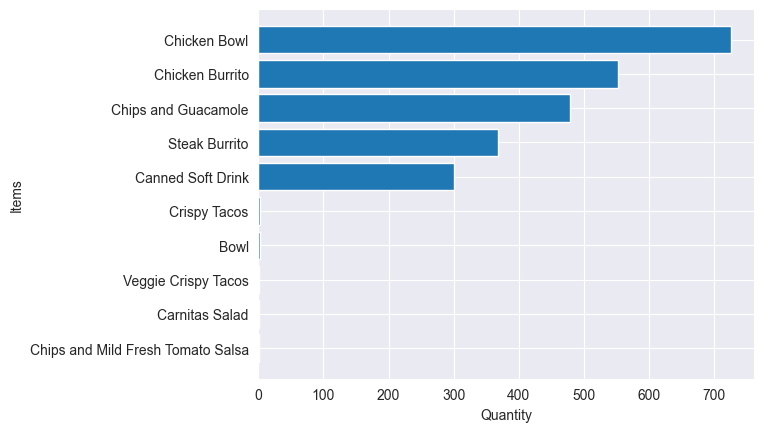

In [11]:
keys = tuple(item[0] for item in concat)
vals = tuple(item[1] for item in concat)
plt.barh(keys,vals)
plt.xlabel("Quantity")
plt.ylabel("Items")
plt.show()